In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Raw file URL
raw_url = 'https://gist.githubusercontent.com/sachinsdate/c17931a3f000492c1c42cf78bf4ce9fe/raw/nyc_bb_bicyclist_counts.csv'

# Load the CSV file into a DataFrame
bike_data = pd.read_csv(raw_url)

# Inspect the dataset
display(bike_data.info())
display(bike_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      214 non-null    object 
 1   HIGH_T    214 non-null    float64
 2   LOW_T     214 non-null    float64
 3   PRECIP    214 non-null    float64
 4   BB_COUNT  214 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 8.5+ KB


None

,Date,HIGH_T,LOW_T,PRECIP,BB_COUNT
0,1-Apr-17,46.0,37.0,0.00,606
1,2-Apr-17,62.1,41.0,0.00,2021
2,3-Apr-17,63.0,50.0,0.03,2470
3,4-Apr-17,51.1,46.0,1.18,723
4,5-Apr-17,63.0,46.0,0.00,2807


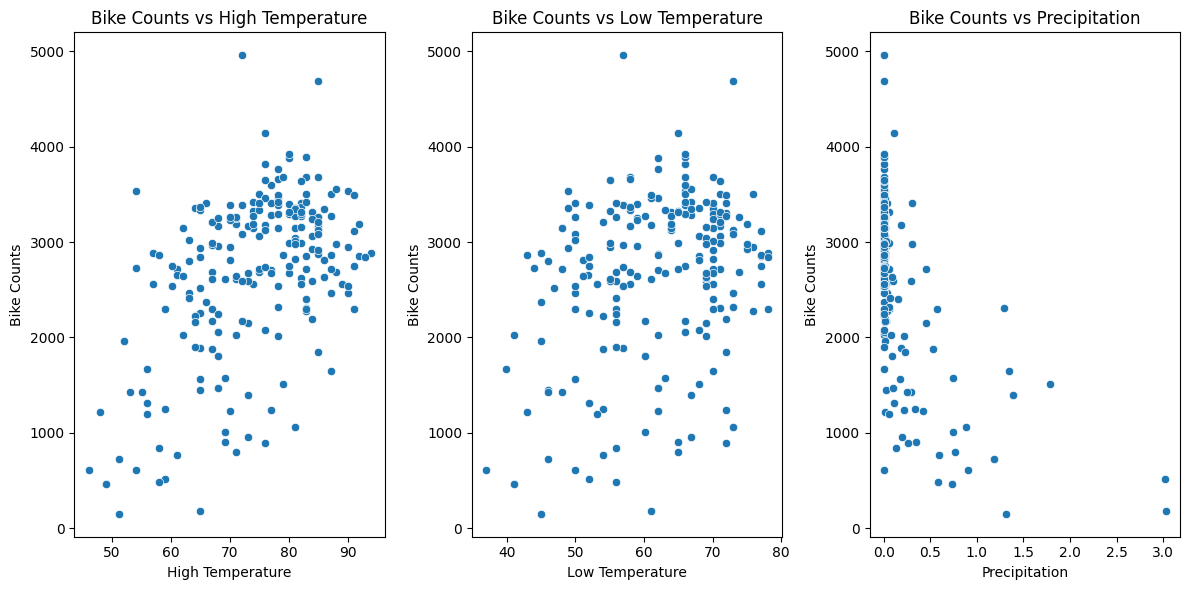

In [10]:
# Scatter plots for bike counts vs weather variables
plt.figure(figsize=(12, 6))

# High temperature
plt.subplot(1, 3, 1)
sns.scatterplot(x=bike_data['HIGH_T'], y=bike_data['BB_COUNT'])
plt.title('Bike Counts vs High Temperature')
plt.xlabel('High Temperature')
plt.ylabel('Bike Counts')

# Low temperature
plt.subplot(1, 3, 2)
sns.scatterplot(x=bike_data['LOW_T'], y=bike_data['BB_COUNT'])
plt.title('Bike Counts vs Low Temperature')
plt.xlabel('Low Temperature')
plt.ylabel('Bike Counts')

# Precipitation
plt.subplot(1, 3, 3)
sns.scatterplot(x=bike_data['PRECIP'], y=bike_data['BB_COUNT'])
plt.title('Bike Counts vs Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Bike Counts')

plt.tight_layout()
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:               BB_COUNT   No. Observations:                  214
Model:                            GLM   Df Residuals:                      210
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16089.
Date:                Tue, 03 Dec 2024   Deviance:                       30113.
Time:                        17:18:37   Pearson chi2:                 2.94e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0321      0.010    675.941      0.0

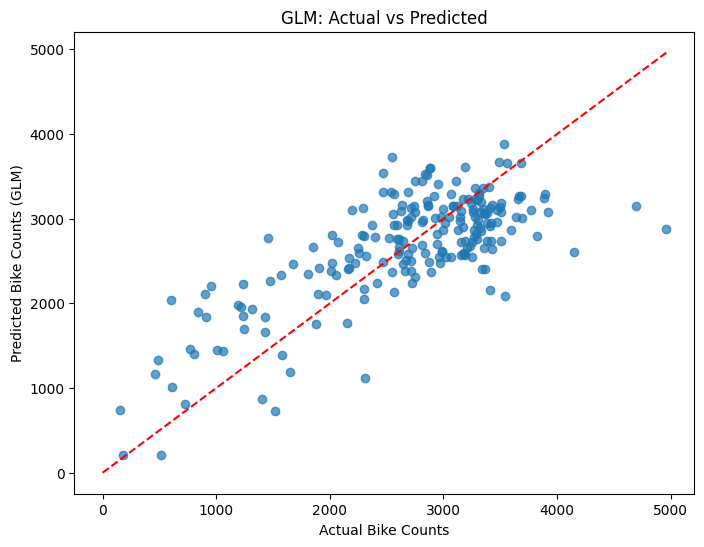

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit a Poisson GLM
glm_model = smf.glm(formula="BB_COUNT ~ HIGH_T + LOW_T + PRECIP", 
                    data=bike_data, 
                    family=sm.families.Poisson()).fit()

# Display model summary
print(glm_model.summary())

# Add predictions to the dataset
bike_data['GLM_Predictions'] = glm_model.predict(bike_data)

# Evaluate the GLM visually
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(bike_data['BB_COUNT'], bike_data['GLM_Predictions'], alpha=0.7)
plt.plot([0, max(bike_data['BB_COUNT'])], [0, max(bike_data['BB_COUNT'])], color='red', linestyle='--')
plt.xlabel('Actual Bike Counts')
plt.ylabel('Predicted Bike Counts (GLM)')
plt.title('GLM: Actual vs Predicted')
plt.show()

Linear Regression Performance:
Mean Squared Error: 350535.57
R-squared: 0.51


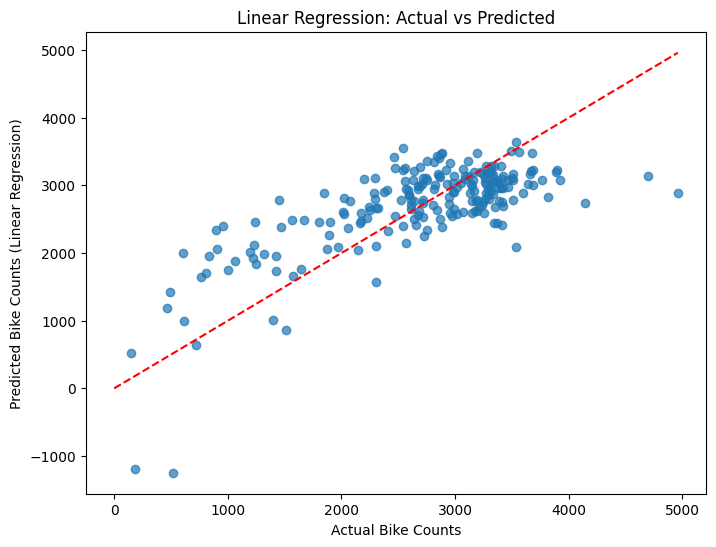

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data for regression
X = bike_data[['HIGH_T', 'LOW_T', 'PRECIP']]
y = bike_data['BB_COUNT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg_model.predict(X_test)

# Evaluate the linear regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Add predictions to the dataset
bike_data['LR_Predictions'] = lin_reg_model.predict(X)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(bike_data['BB_COUNT'], bike_data['LR_Predictions'], alpha=0.7)
plt.plot([0, max(bike_data['BB_COUNT'])], [0, max(bike_data['BB_COUNT'])], color='red', linestyle='--')
plt.xlabel('Actual Bike Counts')
plt.ylabel('Predicted Bike Counts (Linear Regression)')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

Comparison of Models:
GLM Deviance Explained (R² Approximation): 0.57
Linear Regression R²: 0.51


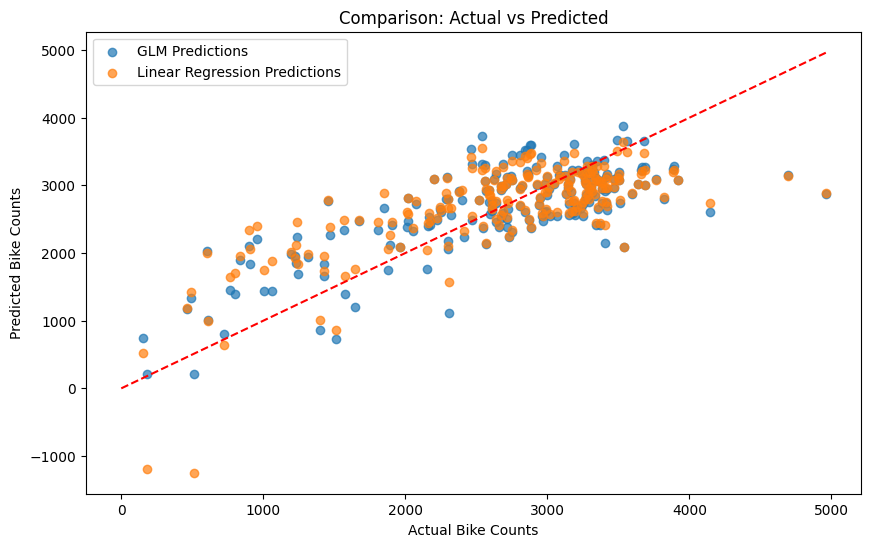

In [17]:
# Compare R-squared (approximation for GLM)
glm_r2 = 1 - (glm_model.deviance / glm_model.null_deviance)

print("Comparison of Models:")
print(f"GLM Deviance Explained (R² Approximation): {glm_r2:.2f}")
print(f"Linear Regression R²: {r2:.2f}")

# Combine both predictions into a plot
plt.figure(figsize=(10, 6))
plt.scatter(bike_data['BB_COUNT'], bike_data['GLM_Predictions'], label='GLM Predictions', alpha=0.7)
plt.scatter(bike_data['BB_COUNT'], bike_data['LR_Predictions'], label='Linear Regression Predictions', alpha=0.7)
plt.plot([0, max(bike_data['BB_COUNT'])], [0, max(bike_data['BB_COUNT'])], color='red', linestyle='--')
plt.xlabel('Actual Bike Counts')
plt.ylabel('Predicted Bike Counts')
plt.title('Comparison: Actual vs Predicted')
plt.legend()
plt.show()